In [2]:
import pdb
import numpy as np

import json
import os
import re
import csv
import colorcet as cc

In [21]:
def bar_plot(ax, data, colors=[cc.glasbey[1], cc.glasbey[0], cc.glasbey[2]], total_width=0.8, single_width=1, legend=True):
    """Draws a bar plot with multiple bars per data point.

    Parameters
    ----------
    ax : matplotlib.pyplot.axis
        The axis we want to draw our plot on.

    data: dictionary
        A dictionary containing the data we want to plot. Keys are the names of the
        data, the items is a list of the values.

        Example:
        data = {
            "x":[1,2,3],
            "y":[1,2,3],
            "z":[1,2,3],
        }

    colors : array-like, optional
        A list of colors which are used for the bars. If None, the colors
        will be the standard matplotlib color cyle. (default: None)

    total_width : float, optional, default: 0.8
        The width of a bar group. 0.8 means that 80% of the x-axis is covered
        by bars and 20% will be spaces between the bars.

    single_width: float, optional, default: 1
        The relative width of a single bar within a group. 1 means the bars
        will touch eachother within a group, values less than 1 will make
        these bars thinner.

    legend: bool, optional, default: True
        If this is set to true, a legend will be added to the axis.
    """

    # Check if colors where provided, otherwhise use the default color cycle
    if colors is None:
        colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

    # Number of bars per group
    n_bars = len(data)

    # The width of a single bar
    bar_width = total_width / n_bars

    # List containing handles for the drawn bars, used for the legend
    bars = []

    # Iterate over all data
    for i, (name, values) in enumerate(data.items()):
        # The offset in x direction of that bar
        x_offset = (i - n_bars / 2) * bar_width + bar_width / 2

        # Draw a bar for every value of that type
        for x, y in enumerate(values):
            bar = ax.bar(x + x_offset, y, width=bar_width * single_width, color=colors[i % len(colors)])

        # Add a handle to the last drawn bar, which we'll need for the legend
        bars.append(bar[0])

    # Draw legend if we need
    if legend:
        ax.legend(bars, data.keys())
    if legend==False:
        return bars

In [4]:
import pdb
import numpy as np

import json
import os
import re
import csv

anacor_path = '/dls/i23/data/2024/nr29467-33/processing/tomography/anacor/insulin'
dials_path  = '/dls/i23/data/2024/nr29467-33/processing/tomography/just_dials/insulin'
csv_path    = '/dls/i23/data/2024/nr29467-33/processing/tomography/results/csvs'

# data_list = []
# for dataset_path in os.listdir(anacor_path):
#     if os.path.isdir(os.path.join(anacor_path, dataset_path)) is True and dataset_path != 'rd_test':
#         data_list.append(dataset_path)
# dataset = dataset_path.split("/")
# dataset = dataset[-1]
data_list = ['con_3p0', 'con_3p5', 'ls_3p0', 'ls_3p5']
dataset_list = sorted(data_list)
print(dataset_list)

for dir in (dataset_list):
    
    I_and_rmerge = []

    for target in ['ac','acsh', 'sh']:
        
        i = dataset_list.index(dir)
        if target == 'ac' or target == 'acsh':
            target_path = os.path.join(anacor_path, dir, f'ins_{dir}_save_data','ResultData','dials_output',f'ins_{dir}_{target}_log.log')
            #print(target_path)
        elif target == 'sh':
            target_path = os.path.join(dials_path, f'ins_{dir[0:-4]}', 'LogFiles','AUTOMATIC_DEFAULT_SCALE.log')
            #print(target_path)
        
        if os.path.exists(target_path):
            print(f'{dir} {target} log  exists')
            with open(target_path, 'r') as file:
                lines = file.readlines()
        else:
            print(f'{dir} {target} log does not exist')
            break

        # Find the start and end indices of the table
        start_index = None
        end_index = None
        for i, line in enumerate(lines):
            if '-------------Summary of merging statistics--------------' in line:
                start_index = i + 2#1
                
            elif 'Writing html report to ' in line:
                end_index = i - 1

        for line in lines[start_index:end_index]:
            # Remove leading/trailing whitespaces and split the line into columns
            columns = line.strip().split()

            # Convert the columns to floats
            row_data = [col for col in columns]
            if row_data[0] == 'I/sigma':
                #I_list.append(f'\n{dir} :{target}: {float(row_data[1])}')
                I_and_rmerge.append(f'\n{dir.replace("p",".").replace("_",":").replace("ls:3.0","LS").replace("con:3.0","Control")} :{target}: {float(row_data[1])} ')
            if row_data[0] == 'Rmerge(I)':
                #rmerge_list.append(f'\n{dir} :{target}: {float(row_data[1])}')
                I_and_rmerge.append(f'{float(row_data[1])}')

        #print(f'{dir}, {target}, {I_list}, {rmerge_list}')
        #table_data.append(I_list)

    dataset_filename = f'{csv_path}/ins_{dir}_I_and_r_merge.csv'#.format(target)
    with open(dataset_filename, 'w') as dataset_file:
        writer = csv.writer(dataset_file, delimiter=' ', escapechar=' ', quoting=csv.QUOTE_NONE)
        writer.writerow(I_and_rmerge)
            

['con_3p0', 'con_3p5', 'ls_3p0', 'ls_3p5']
con_3p0 ac log  exists
con_3p0 acsh log  exists
con_3p0 sh log  exists
con_3p5 ac log  exists
con_3p5 acsh log  exists
con_3p5 sh log  exists
ls_3p0 ac log  exists
ls_3p0 acsh log  exists
ls_3p0 sh log  exists
ls_3p5 ac log  exists
ls_3p5 acsh log  exists
ls_3p5 sh log  exists


/tmp/ipykernel_247393/285016279.py:21: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv(file_path, names=['set_id', 'method', 'I_value', 'r_value'], skiprows=0, sep=('  '))
/tmp/ipykernel_247393/285016279.py:21: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv(file_path, names=['set_id', 'method', 'I_value', 'r_value'], skiprows=0, sep=('  '))


    set_id  method  I_value  r_value
0       LS    :ac:     49.1    0.094
1       LS  :acsh:     69.8    0.069
2       LS    :sh:     72.2    0.070
0  Control    :ac:     59.9    0.083
1  Control  :acsh:     72.3    0.074
2  Control    :sh:     32.1    0.120


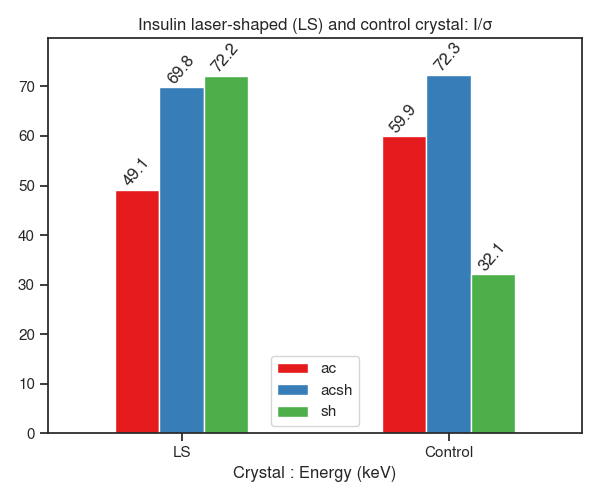

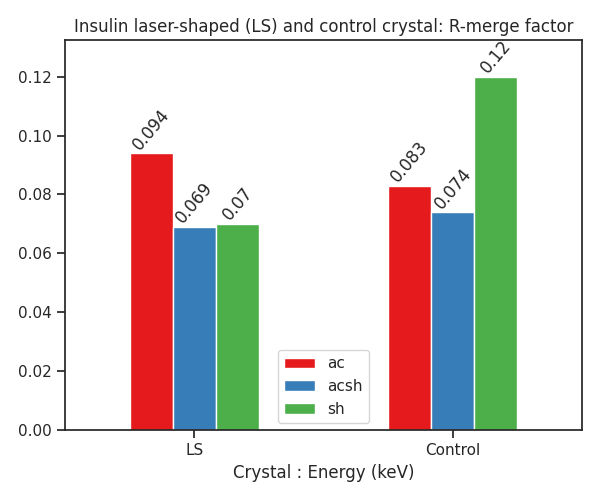

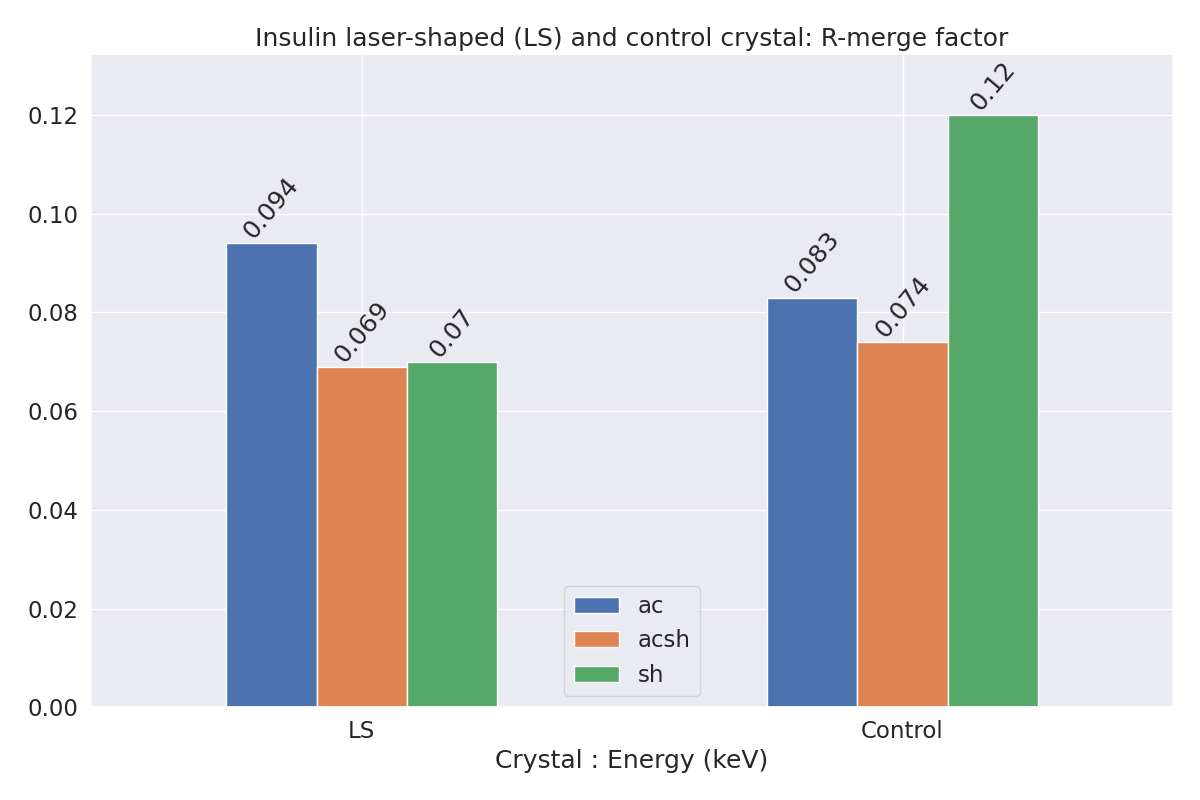

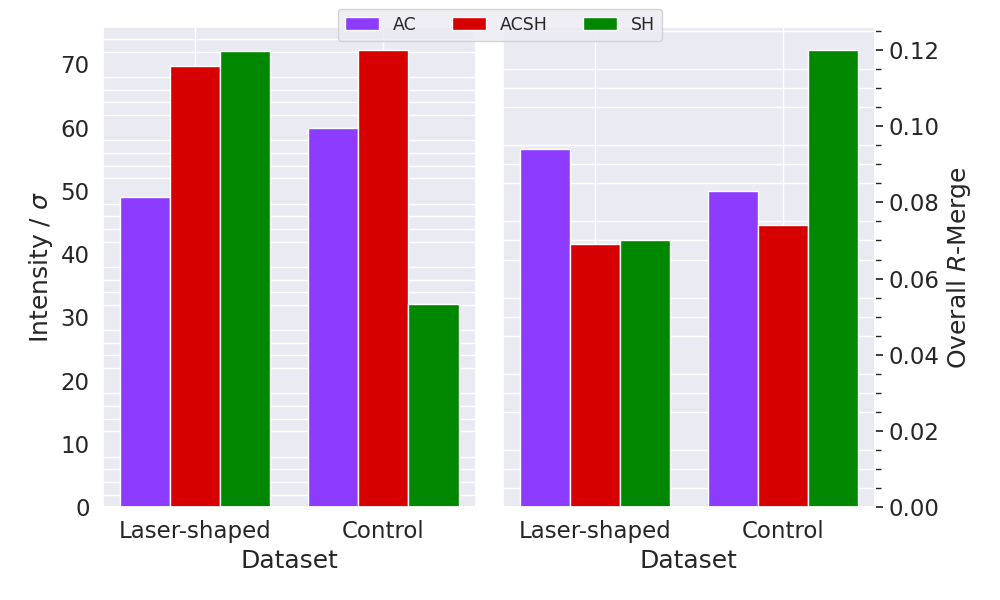

In [17]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.ticker as mticker
import colorcet as cc

# Put the path to your data files here
file_paths = [
    #'/dls/i23/data/2024/nr29467-33/processing/tomography/results/csvs/ins_ls_3p5_I_and_r_merge.csv',
    '/dls/i23/data/2024/nr29467-33/processing/tomography/results/csvs/ins_ls_3p0_I_and_r_merge.csv',
    #'/dls/i23/data/2024/nr29467-33/processing/tomography/results/csvs/ins_con_3p5_I_and_r_merge.csv',
    '/dls/i23/data/2024/nr29467-33/processing/tomography/results/csvs/ins_con_3p0_I_and_r_merge.csv'
]

# Read and concatenate all datasets, adding a 'set_id' to distinguish them
all_data = []
methods = ['method:acsh:', 'method:sh:', 'method:ac:']

for i, file_path in enumerate(file_paths, start=1):
    df = pd.read_csv(file_path, names=['set_id', 'method', 'I_value', 'r_value'], skiprows=0, sep=('  '))
    #df['set_id'] = f"Set {i}"  # Adding a set identifier
    df['set_id'] = df['set_id'].replace(to_replace='_', value=': ')
    all_data.append(df)

# Concatenating all the dataframes
combined_data = pd.concat(all_data)
print(combined_data)

ac = combined_data[combined_data['method']==':ac:']
acsh = combined_data[combined_data['method']==':acsh:']
sh = combined_data[combined_data['method']==':sh:']

#sns.set_style("darkgrid")
sns.set(palette='Set1', style='ticks') # Set2
#sns.set(font_scale=1)
#plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'Nimbus Sans'
ax = pd.DataFrame({'ac':list(ac['I_value']), 'acsh':list(acsh['I_value']), 'sh':list(sh['I_value'])}, index=list(ac['set_id']))
ax = ax.plot(kind='bar', legend=True, figsize=(6,5))
plt.title(f'Insulin laser-shaped (LS) and control crystal: I/σ')
ax.legend(loc='lower center')
plt.xlabel('Crystal : Energy (keV)')
#plt.ylabel('Intensity')
plt.xticks(rotation=0)
for container in ax.containers:
    ax.bar_label(container, rotation=50)#, fontsize='x-small'
lim = ax.get_ylim()
ax.set_ylim(lim[0], lim[1]*1.05)
plt.tight_layout()
plt.savefig('/dls/i23/data/2024/nr29467-33/processing/tomography/results/plots/ins_I_over_sigma.png')
plt.savefig('/home/icf19162/CP5-Thesis/plots/exp2/ins_I_over_sigma.png', dpi=300)
plt.show()


#sns.set_style("darkgrid")
sns.set(palette='Set1', style='ticks')
#sns.set(font_scale=1) # Removes Ticks style
ax2 = pd.DataFrame({'ac':list(ac['r_value']), 'acsh':list(acsh['r_value']), 'sh':list(sh['r_value'])}, index=list(ac['set_id']))
ax2 = ax2.plot(kind='bar', legend=True, figsize=(6,5))
plt.title(f'Insulin laser-shaped (LS) and control crystal: R-merge factor')
ax2.legend(loc='lower center')
plt.xlabel('Crystal : Energy (keV)')
#plt.ylabel('R-merge')
plt.xticks(rotation=0)
for container in ax2.containers:
    ax2.bar_label(container, rotation=50)#, fontsize='x-small'
lim = ax2.get_ylim()
ax2.set_ylim(lim[0], lim[1]*1.05)
plt.tight_layout()
plt.savefig('/dls/i23/data/2024/nr29467-33/processing/tomography/results/plots/ins_rmerges.png')
plt.savefig('/home/icf19162/CP5-Thesis/plots/exp2/ins_rmerges.png', dpi=300)
plt.show()




sns.set(palette='Set1', style='ticks')
sns.set(font_scale=1.5)
ax2 = pd.DataFrame({'ac':list(ac['r_value']), 'acsh':list(acsh['r_value']), 'sh':list(sh['r_value'])}, index=list(ac['set_id']))
ax2 = ax2.plot(kind='bar', legend=True, figsize=(12,8))
plt.title(f'Insulin laser-shaped (LS) and control crystal: R-merge factor')
ax2.legend(loc='lower center')
plt.xlabel('Crystal : Energy (keV)')
#plt.ylabel('R-merge')
plt.xticks(rotation=0)
for container in ax2.containers:
    ax2.bar_label(container, rotation=50)#fontsize='x-large'
lim = ax2.get_ylim()
ax2.set_ylim(lim[0], lim[1]*1.05)
plt.tight_layout()
#plt.savefig()
plt.show()





In [14]:
%matplotlib widget 

/tmp/ipykernel_247393/800394462.py:21: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv(file_path, names=['set_id', 'method', 'I_value', 'r_value'], skiprows=0, sep=('  '))
/tmp/ipykernel_247393/800394462.py:21: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv(file_path, names=['set_id', 'method', 'I_value', 'r_value'], skiprows=0, sep=('  '))


    set_id  method  I_value  r_value
0       LS    :ac:     49.1    0.094
1       LS  :acsh:     69.8    0.069
2       LS    :sh:     72.2    0.070
0  Control    :ac:     59.9    0.083
1  Control  :acsh:     72.3    0.074
2  Control    :sh:     32.1    0.120


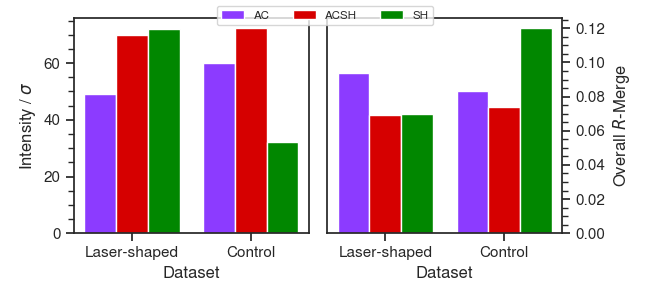

In [29]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.ticker as mticker
import colorcet as cc

# Put the path to your data files here
file_paths = [
    #'/dls/i23/data/2024/nr29467-33/processing/tomography/results/csvs/ins_ls_3p5_I_and_r_merge.csv',
    '/dls/i23/data/2024/nr29467-33/processing/tomography/results/csvs/ins_ls_3p0_I_and_r_merge.csv',
    #'/dls/i23/data/2024/nr29467-33/processing/tomography/results/csvs/ins_con_3p5_I_and_r_merge.csv',
    '/dls/i23/data/2024/nr29467-33/processing/tomography/results/csvs/ins_con_3p0_I_and_r_merge.csv'
]

# Read and concatenate all datasets, adding a 'set_id' to distinguish them
all_data = []
methods = ['method:acsh:', 'method:sh:', 'method:ac:']

for i, file_path in enumerate(file_paths, start=1):
    df = pd.read_csv(file_path, names=['set_id', 'method', 'I_value', 'r_value'], skiprows=0, sep=('  '))
    #df['set_id'] = f"Set {i}"  # Adding a set identifier
    df['set_id'] = df['set_id'].replace(to_replace='_', value=': ')
    all_data.append(df)

# Concatenating all the dataframes
combined_data = pd.concat(all_data)
print(combined_data)

ac = combined_data[combined_data['method']==':ac:']
acsh = combined_data[combined_data['method']==':acsh:']
sh = combined_data[combined_data['method']==':sh:']

n = len(file_paths)

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(6.5,3))
ax1.grid(axis='y', which='both')
ax2.grid(axis='y', which='both')
data1 = {'AC':ac['I_value'].to_list(), 'ACSH':acsh['I_value'].to_list(), 'SH':sh['I_value'].to_list()}
bars = bar_plot(ax1, data1, legend=False, colors=[cc.glasbey[1], cc.glasbey[0], cc.glasbey[2]])
#ax1.legend(bars, data1.keys(), ncols=3, fontsize='x-small', bbox_to_anchor=(1.6,1.15))
ax1.yaxis.set_minor_locator(mticker.AutoMinorLocator())
ax1.set_xticks([0,1])
#ax1.set_xticks(list(np.arange(n-1)))
ax1.set_xticklabels([list(ac['set_id'])[i].replace('LS', 'Laser-shaped') for i in range(n)])
ax1.set_ylabel("Intensity / $\sigma$")
ax1.set_xlabel("Dataset")

data2 = {'AC':ac['r_value'].to_list(), 'ACSH':acsh['r_value'].to_list(), 'SH':sh['r_value'].to_list()}
bars2 = bar_plot(ax2, data2, legend=False)
#ax1.legend(bars, data1.keys(), ncols=3, fontsize='x-small', bbox_to_anchor=(1,1.15))
ax2.yaxis.set_minor_locator(mticker.AutoMinorLocator())
ax2.set_xticks([0,1])
#ax2.set_xticks(list(np.arange(n-1)))
ax2.set_xticklabels([list(ac['set_id'])[i].replace('LS', 'Laser-shaped') for i in range(n)])
ax2.set_ylabel("Overall $R$-Merge")
ax2.set_xlabel("Dataset")
ax2.yaxis.set_ticks_position('right')
ax2.yaxis.set_label_position('right')
fig.legend(bars, data1.keys(), ncols=3, fontsize='x-small', loc='upper center')
#fig.tight_layout()
#plt.savefig('/home/icf19162/CP5-Thesis/plots/exp2/ins_stats.pdf')
ax1.grid(axis='y', which='both')
ax2.grid(axis='y', which='both')
fig.tight_layout()
#plt.savefig('/home/icf19162/CP5-Thesis/plots/exp2/ins_stats.pdf')

/tmp/ipykernel_247393/1248877193.py:22: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv(file_path, names=['set_id', 'method', 'I_value', 'r_value'], skiprows=0, sep=('  '))
/tmp/ipykernel_247393/1248877193.py:22: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv(file_path, names=['set_id', 'method', 'I_value', 'r_value'], skiprows=0, sep=('  '))


    set_id  method  I_value  r_value
0       LS    :ac:     49.1    0.094
1       LS  :acsh:     69.8    0.069
2       LS    :sh:     72.2    0.070
0  Control    :ac:     59.9    0.083
1  Control  :acsh:     72.3    0.074
2  Control    :sh:     32.1    0.120


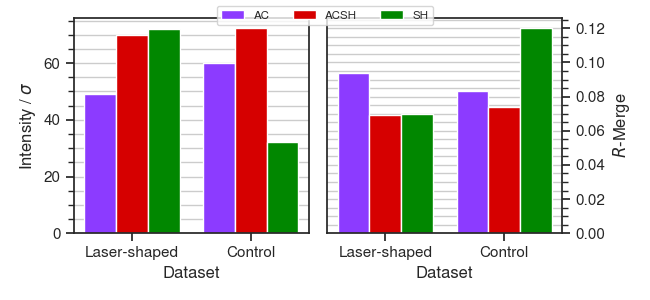

In [30]:
# test
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.ticker as mticker
import colorcet as cc

# Put the path to your data files here
file_paths = [
    #'/dls/i23/data/2024/nr29467-33/processing/tomography/results/csvs/ins_ls_3p5_I_and_r_merge.csv',
    '/dls/i23/data/2024/nr29467-33/processing/tomography/results/csvs/ins_ls_3p0_I_and_r_merge.csv',
    #'/dls/i23/data/2024/nr29467-33/processing/tomography/results/csvs/ins_con_3p5_I_and_r_merge.csv',
    '/dls/i23/data/2024/nr29467-33/processing/tomography/results/csvs/ins_con_3p0_I_and_r_merge.csv'
]

# Read and concatenate all datasets, adding a 'set_id' to distinguish them
all_data = []
methods = ['method:acsh:', 'method:sh:', 'method:ac:']

for i, file_path in enumerate(file_paths, start=1):
    df = pd.read_csv(file_path, names=['set_id', 'method', 'I_value', 'r_value'], skiprows=0, sep=('  '))
    df['set_id'] = df['set_id']#.replace(to_replace='_', value=': ')
    all_data.append(df)

# Concatenating all the dataframes
combined_data = pd.concat(all_data)
print(combined_data)

ac = combined_data[combined_data['method']==':ac:']
acsh = combined_data[combined_data['method']==':acsh:']
sh = combined_data[combined_data['method']==':sh:']


n = len(file_paths)

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(6.5,3))
data1 = {'AC':ac['I_value'].to_list(), 'ACSH':acsh['I_value'].to_list(), 'SH':sh['I_value'].to_list()}
bars = bar_plot(ax1, data1, legend=False, colors=[cc.glasbey[1], cc.glasbey[0], cc.glasbey[2]])
#ax1.legend(bars, data1.keys(), ncols=3, fontsize='x-small', bbox_to_anchor=(1.6,1.15))
ax1.yaxis.set_minor_locator(mticker.AutoMinorLocator())
ax1.set_xticks([0,1])
#ax1.set_xticks(list(np.arange(n-1)))
ax1.set_xticklabels([list(ac['set_id'])[i].replace('LS', 'Laser-shaped') for i in range(n)])
ax1.set_ylabel("Intensity / $\sigma$")
ax1.set_xlabel("Dataset")

data2 = {'AC':ac['r_value'].to_list(), 'ACSH':acsh['r_value'].to_list(), 'SH':sh['r_value'].to_list()}
bars2 = bar_plot(ax2, data2, legend=False)
#ax1.legend(bars, data1.keys(), ncols=3, fontsize='x-small', bbox_to_anchor=(1,1.15))
ax2.yaxis.set_minor_locator(mticker.AutoMinorLocator())
ax2.set_xticks([0,1])
#ax2.set_xticks(list(np.arange(n-1)))
ax2.set_xticklabels([list(ac['set_id'])[i].replace('LS', 'Laser-shaped') for i in range(n)])
ax2.set_ylabel("$R$-Merge")
ax2.set_xlabel("Dataset")
ax2.yaxis.set_ticks_position('right')
ax2.yaxis.set_label_position('right')
fig.legend(bars, data1.keys(), ncols=3, fontsize='x-small', loc='upper center')
fig.tight_layout()
#plt.savefig('/home/icf19162/CP5-Thesis/plots/exp2/ins_stats.pdf')
ax1.grid(axis='y', which='both')
ax2.grid(axis='y', which='both')
fig.tight_layout()
plt.savefig('/home/icf19162/CP5-Thesis/plots/exp2/ins_stats.pdf')